In [1]:
cd


C:\Users\DEEPIKA SINGH


In [2]:
pwd

'C:\\Users\\DEEPIKA SINGH'

In [3]:
cd F:\Machine learning projects\Predict_TestScore

F:\Machine learning projects\Predict_TestScore


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [48]:
#reading the csv file

df = pd.read_csv('test_scores.csv')

df1 = df


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null object
school_type        2133 non-null object
classroom          2133 non-null object
teaching_method    2133 non-null object
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null object
lunch              2133 non-null object
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [50]:
df.shape

(2133, 11)

In [51]:
#checking for any null values
df.isna().sum()


school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [52]:
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0


WE CAN SEE THAT
school - Name of the school
school_setting - its either in urban or suburban or others
school_type - its the type of school
teaching_method - what method does it follow for teaching
n_student - number of student 
student_id - id of the student 
gender 
lunch - qualify for free lunch or not
pretest score
posttest score


In [64]:
df['school'].unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [65]:
df['school_setting'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [66]:
df['school_setting'].describe()

count      2133
unique        3
top       Urban
freq        906
Name: school_setting, dtype: object

In [67]:
df['school_type'].unique()

array(['Non-public', 'Public'], dtype=object)

In [68]:
df['school_type'].describe()

count       2133
unique         2
top       Public
freq        1582
Name: school_type, dtype: object

In [69]:
df['classroom'].unique()

array(['6OL', 'ZNS', '2B1', 'EPS', 'IQN', 'PGK', 'UHU', 'UWK', 'A33',
       'EID', 'HUJ', 'PC6', '1Q1', 'BFY', 'OMI', 'X6Z', '2AP', 'PW5',
       'ROP', 'ST7', 'XXJ', '197', '5LQ', 'JGD', 'HCB', 'NOR', 'X78',
       'YUC', 'ZDT', 'ENO', 'TSA', 'VA6', '18K', 'CXC', 'HKF', 'PBA',
       'U6J', 'W8A', '05H', '98D', 'G2L', 'P2A', 'XZM', '1VD', '21Q',
       '2BR', '3D0', '5JK', 'O6A', 'QTU', 'AJ1', 'J8J', 'RA5', '5SZ',
       '6U9', 'FS3', 'XJ8', '0N7', '3XJ', 'RK7', 'SUR', 'X2O', 'XZ4',
       '1SZ', '62L', 'NWZ', 'S98', '08N', '9AW', 'IPU', 'KXB', 'PGH',
       'XXE', '6C1', 'AE1', 'H7S', 'P8I', 'SSP', 'CD8', 'J6X', 'KR1',
       '341', 'D33', 'DFQ', 'GYM', 'IEM', '7BL', 'A93', 'TB5', 'YTB',
       '1UU', '4NN', 'V77', 'CII', 'Q0E', 'QA2', 'ZBH'], dtype=object)

In [70]:
df['classroom'].nunique()

97

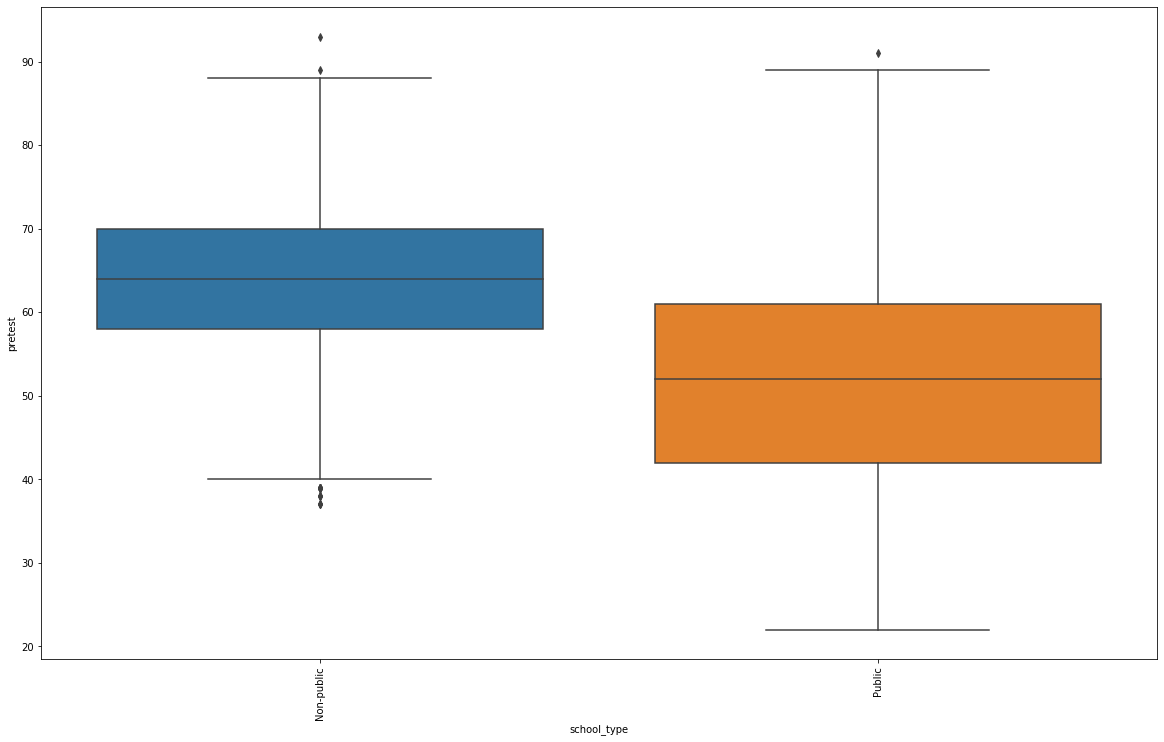

In [71]:
plt.figure(figsize=(20,12))
sns.boxplot(x = 'school_type',y = 'pretest',data = df)
plt.xticks(rotation = 90)
plt.show()

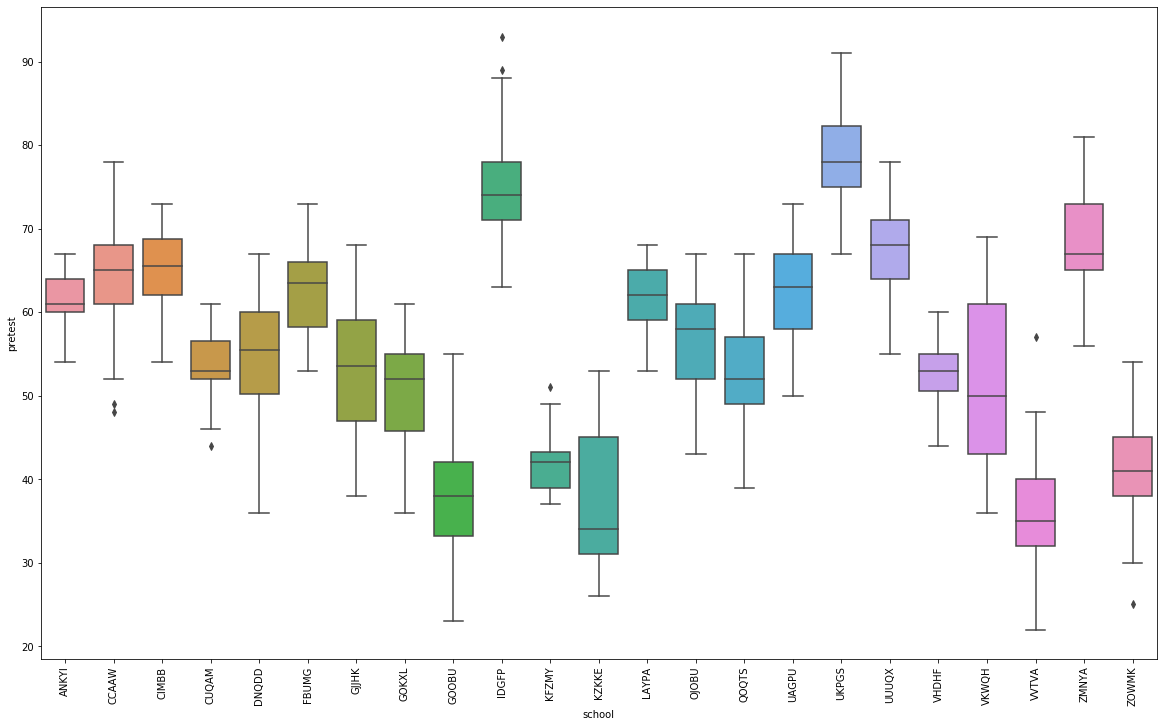

In [72]:
plt.figure(figsize=(20,12))
sns.boxplot(x = 'school',y = 'pretest',data = df)
plt.xticks(rotation = 90)
plt.show()

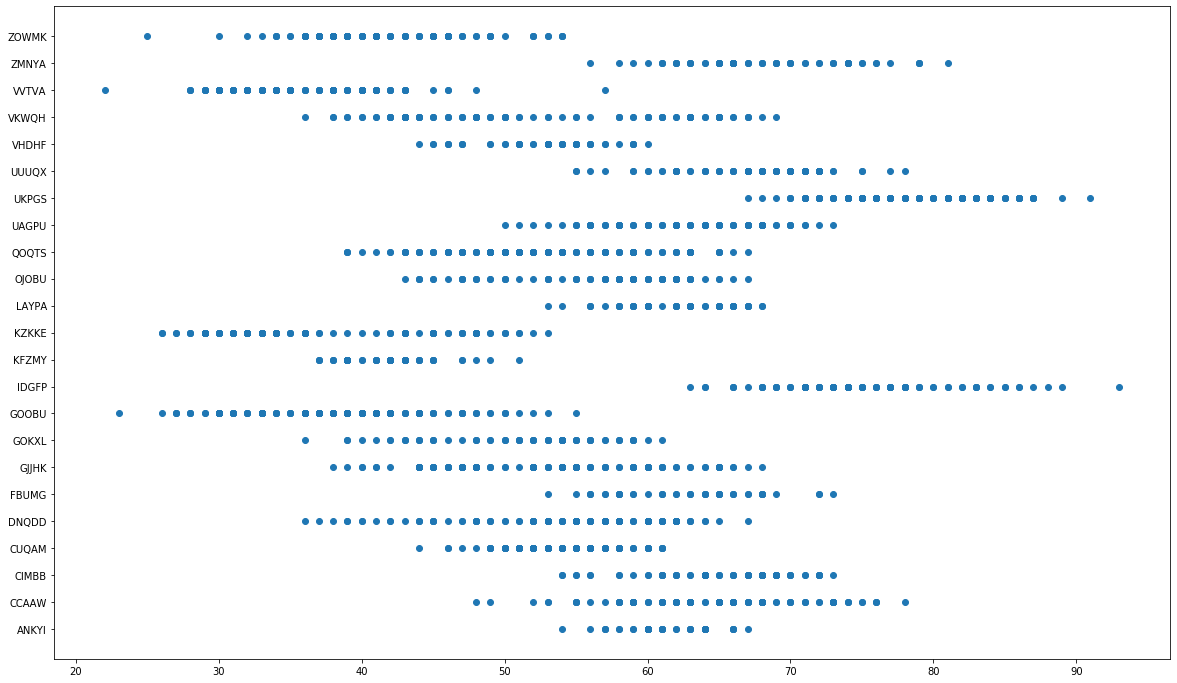

In [73]:
plt.figure(figsize=(20,12))
plt.scatter(x = 'pretest',y = 'school',data = df)

plt.show()

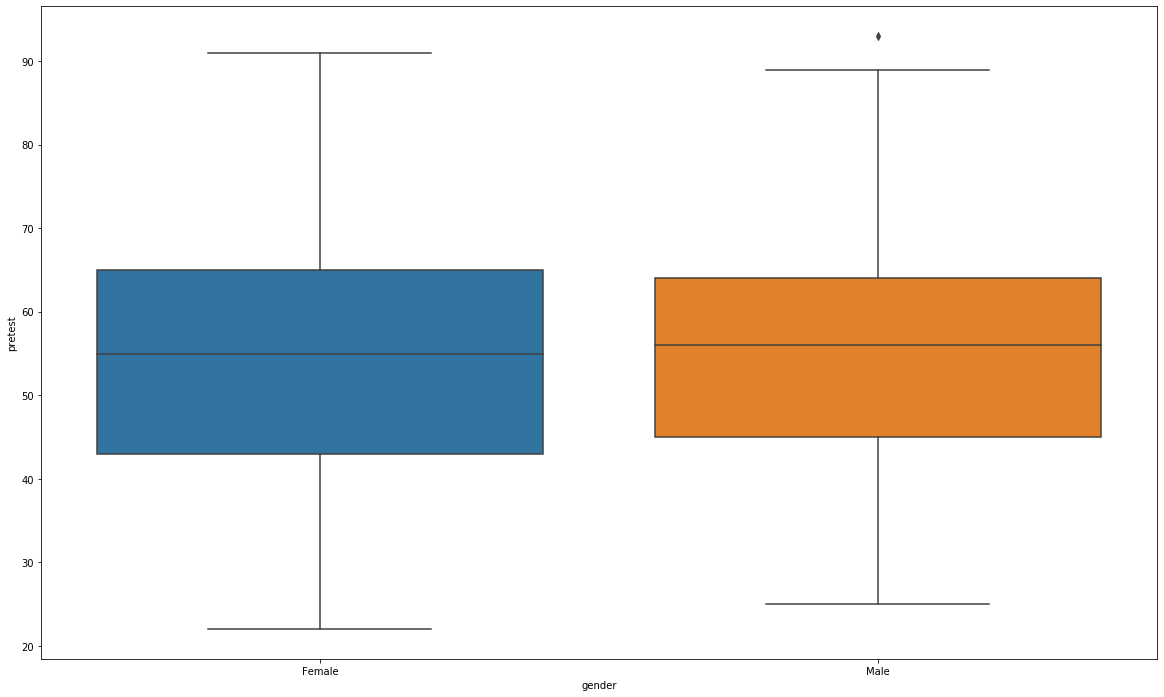

In [74]:
plt.figure(figsize=(20,12))
sns.boxplot(x = 'gender',y = 'pretest',data = df)


plt.show()

In [75]:
df['gender'].describe()


count     2133
unique       2
top       Male
freq      1077
Name: gender, dtype: object

In [76]:
df['classroom'].value_counts()

18K    31
A93    30
Q0E    30
ZBH    30
YTB    30
QA2    30
7BL    29
ROP    28
0N7    28
1Q1    28
HKF    28
OMI    28
SUR    28
2AP    27
ZDT    27
CII    27
BFY    27
1VD    27
XXJ    27
NOR    27
W8A    26
21Q    25
TB5    25
U6J    25
X2O    25
9AW    25
3XJ    24
1UU    24
5JK    24
X6Z    24
       ..
EPS    20
6OL    20
FS3    19
IPU    19
J8J    19
UWK    19
DFQ    19
A33    19
VA6    19
5LQ    18
341    18
KXB    18
2B1    18
AE1    17
5SZ    17
G2L    17
RA5    17
PC6    17
XZM    17
P2A    17
HUJ    17
J6X    16
UHU    16
H7S    16
6C1    16
KR1    15
IQN    15
SSP    15
197    14
JGD    14
Name: classroom, Length: 97, dtype: int64

In [77]:
#removing unwanted features

df.drop(['school', 'classroom', 'n_student', 'student_id', 'gender'], axis=1, inplace=True)

In [78]:
#using one hot encoding for categorical data

t=pd.get_dummies(df[list(df.columns[:4])], drop_first=True)


In [79]:
df= pd.concat([df, t], axis=1)
#removing dup colms
df.drop(list(df.columns[:4]), axis=1, inplace=True)

In [80]:
df

,pretest,posttest,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,lunch_Qualifies for reduced/free lunch
0,62.0,72.0,0,1,0,1,0
1,66.0,79.0,0,1,0,1,0
2,64.0,76.0,0,1,0,1,0
3,61.0,77.0,0,1,0,1,0
4,64.0,76.0,0,1,0,1,0
5,66.0,74.0,0,1,0,1,0
6,63.0,75.0,0,1,0,1,0
7,63.0,72.0,0,1,0,1,0
8,64.0,77.0,0,1,0,1,0
9,61.0,72.0,0,1,0,1,0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [82]:
y = df['posttest']



In [94]:
x = df.iloc[::]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [98]:
#Create pipeline using LinearRegression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('model', LinearRegression())
])

# Create pipeline using random forgest Regression
pipelineRFG = Pipeline([
    ('scaler',MinMaxScaler()),
    ('model',RandomForestRegressor())
])

In [99]:
#fit the pipeline
pipeline.fit(x_train,y_train)
pipelineRFG.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [100]:
pred= pipeline.predict(x_test)

In [101]:
r2_score(y_test, pred)

0.9514275463397855

In [102]:
predr = pipelineRFG.predict(x_test)
r2_score(y_test,predr)


0.936044469591284